In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [34]:
experiment = "april_final"

In [35]:
# Load the data
def load_simulations(memilio_id, experiment):
    result_path = f"../../preprocessing/preprocessed_data/{experiment}/"
    df = pd.read_csv(f"{result_path}/substances/{memilio_id}_output.csv")
    df = df.loc[df.simulation_id == memilio_id].drop(columns=["simulation_id"])
    df["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df["time_in_minutes"], unit="min")
    return df

def load_measurements():
    df_measurements = pd.read_csv(f"../../preprocessing/preprocessed_data/concentration_measurements.csv")
    df_measurements.Location = df_measurements.Location.replace({'Langrieder \nBach': "Am Langwieder Bach",
                                    'Gräfelfinger Str. \n/Waldwiesenstr.': "Gräfelfinger Str.",
                                    "Schmidbartlanger ": "Schmidbartlanger", 
                                    "Savitsstr.": "Savitstr.", 
                                    "Gyßling Becken": "Gyßlinger Becken"})

    df_measurements["Below_threshold"] = False
    df_measurements.loc[df_measurements.Value=="<75", "Below_threshold"] = True
    df_measurements.loc[df_measurements.Value=="<75", "Value"] = 75/2
    df_measurements.Value = df_measurements.Value.astype(float)
    df_measurements.Date = pd.to_datetime(df_measurements.Date)
    return df_measurements

In [37]:
df_1 = load_simulations(89, experiment)
df_2 = load_simulations(99, experiment)

df_measurements = load_measurements()

In [38]:
df_1.head()

,time_in_minutes,variable,value,manhole,time_in_days,Date
0,15,COV19,22.97570,MUC012,0.010417,2020-03-02 00:15:00
1,30,COV19,24.83174,MUC012,0.020833,2020-03-02 00:30:00
2,45,COV19,26.67474,MUC012,0.031250,2020-03-02 00:45:00
3,60,COV19,28.48136,MUC012,0.041667,2020-03-02 01:00:00
4,75,COV19,30.31266,MUC012,0.052083,2020-03-02 01:15:00


In [39]:
df_1.manhole.unique() # 112, 

array(['MUC012', 'MUC060', 'MUC112', 'MUC178', 'MUC258', 'MUC348',
       'MUC362', 'MUC434', 'MUC494', 'MUC560', 'MUC562', 'MUC586',
       'MUC596', 'MUC600', 'MUC608'], dtype=object)

/tmp/ipykernel_91205/1326211490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_91205/1326211490.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


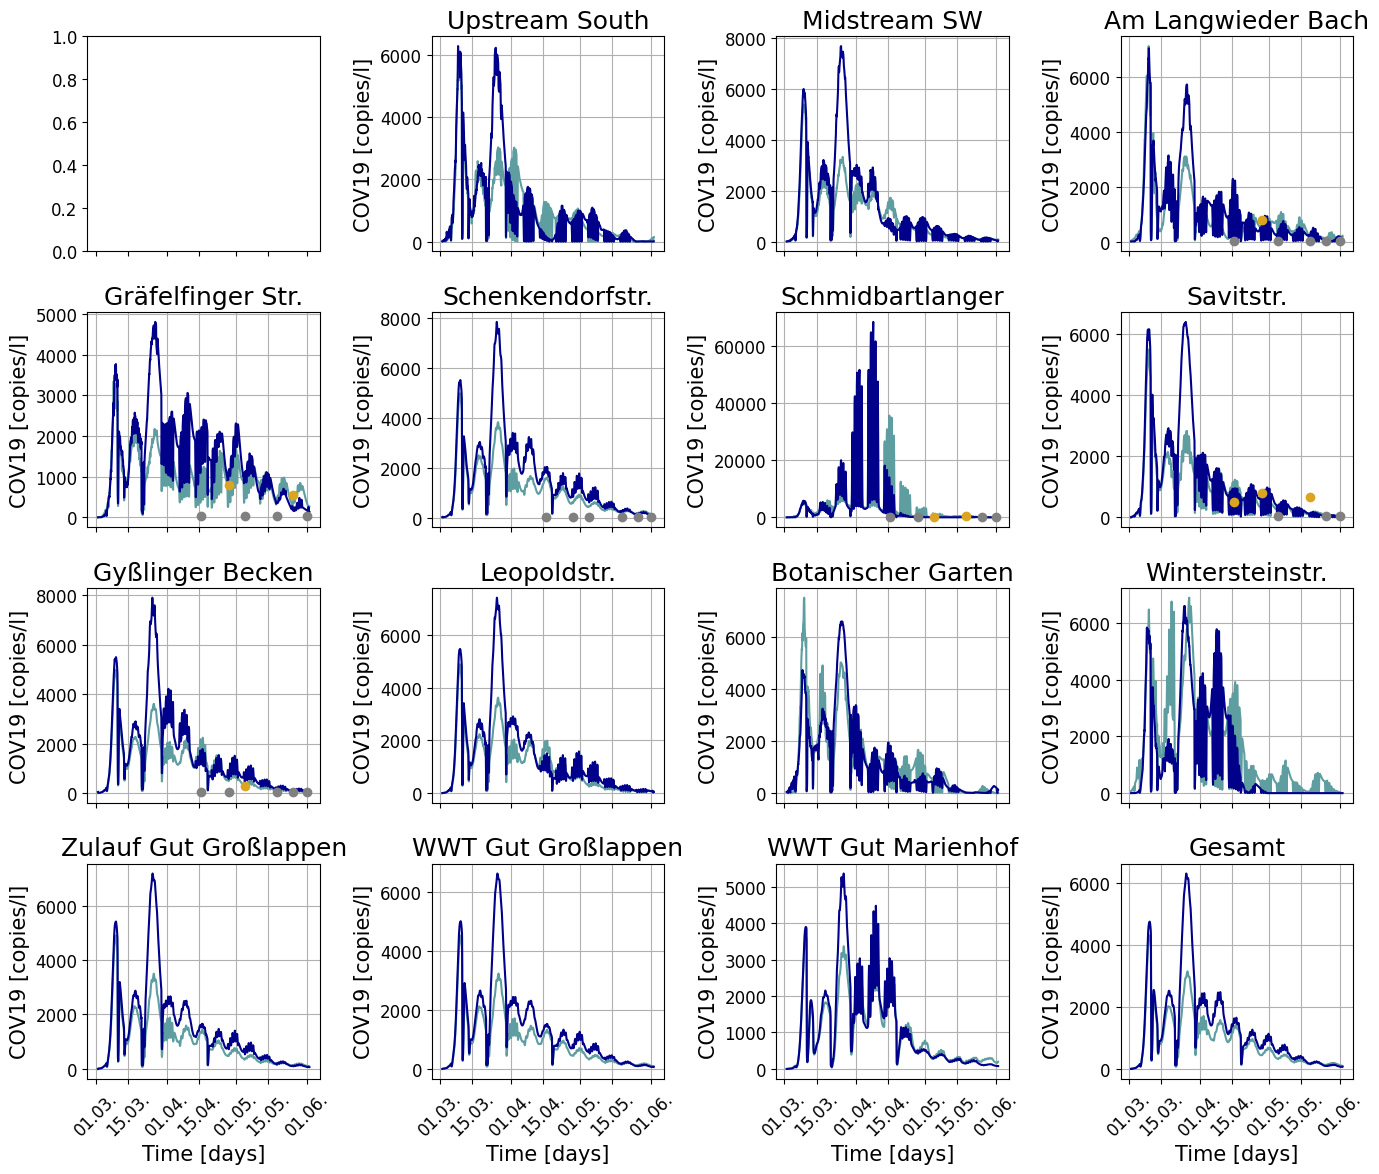

In [40]:
#### First dataset


# Filter data
covid_df = df_1[(df_1["variable"] == "COV19") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()


for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i+1]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color="goldenrod", zorder=10)

    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")


##### Second dataset
covid_df = df_2[(df_2["variable"] == "COV19") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())


for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i+1]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    ax.plot(group["Date"], group["value"], color="darkblue")
    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()


In [26]:
df_2.shape

(264990, 6)

In [32]:
 (df_1.loc[(df_1["variable"] == "COV19"), "value"] -  df_2.loc[(df_2["variable"] == "COV19"), "value"]).describe()

count    132495.000000
mean         -0.028903
std           3.364034
min        -243.015390
25%          -0.012450
50%           0.000000
75%           0.014800
max         202.911950
Name: value, dtype: float64

/tmp/ipykernel_85332/1937018818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


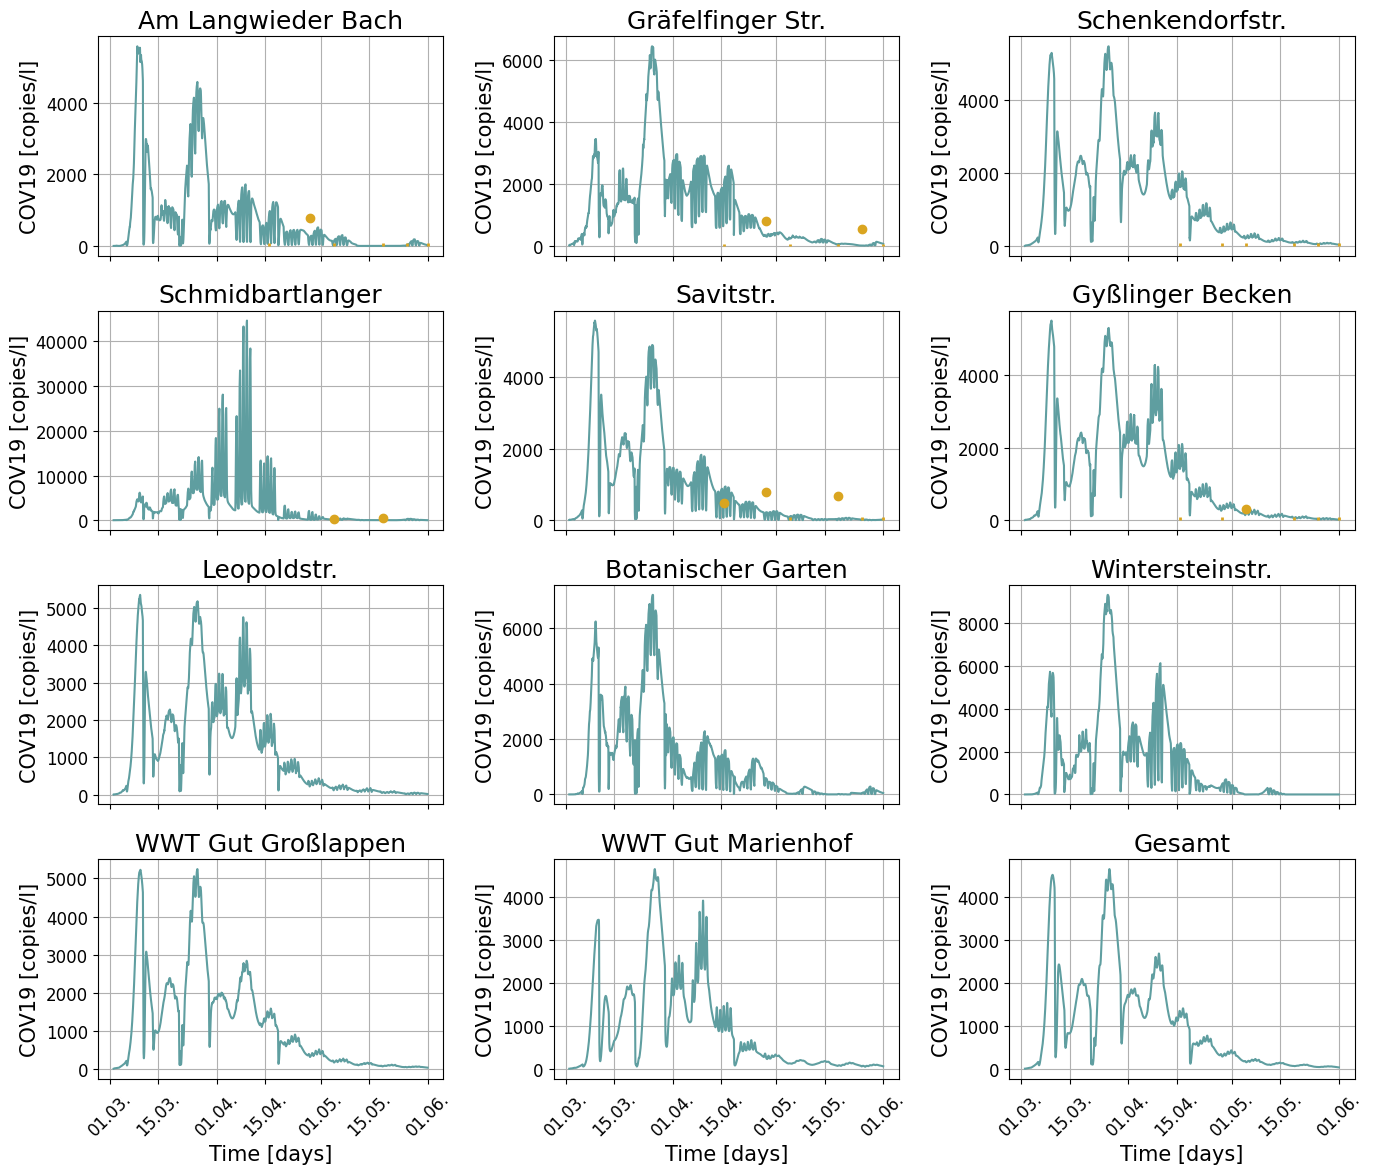

In [17]:
# Filter data
covid_df = df[(df["variable"] == "COV19") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

    # Draw vertical lines for Below_threshold measurements
    below_thresh_dates = measurements.loc[measurements.Below_threshold, "Date"]
    for date in below_thresh_dates:
        ax.vlines(date, ymin=0, ymax=75, color="goldenrod", linewidth=2)

    # Keep goldenrod scatter for non-below-threshold points
    ax.scatter(measurements.loc[~measurements.Below_threshold, "Date"],
               measurements.loc[~measurements.Below_threshold, "Value"],
               color="goldenrod", zorder=10)

    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")
    
# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()

/tmp/ipykernel_76206/3708709711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


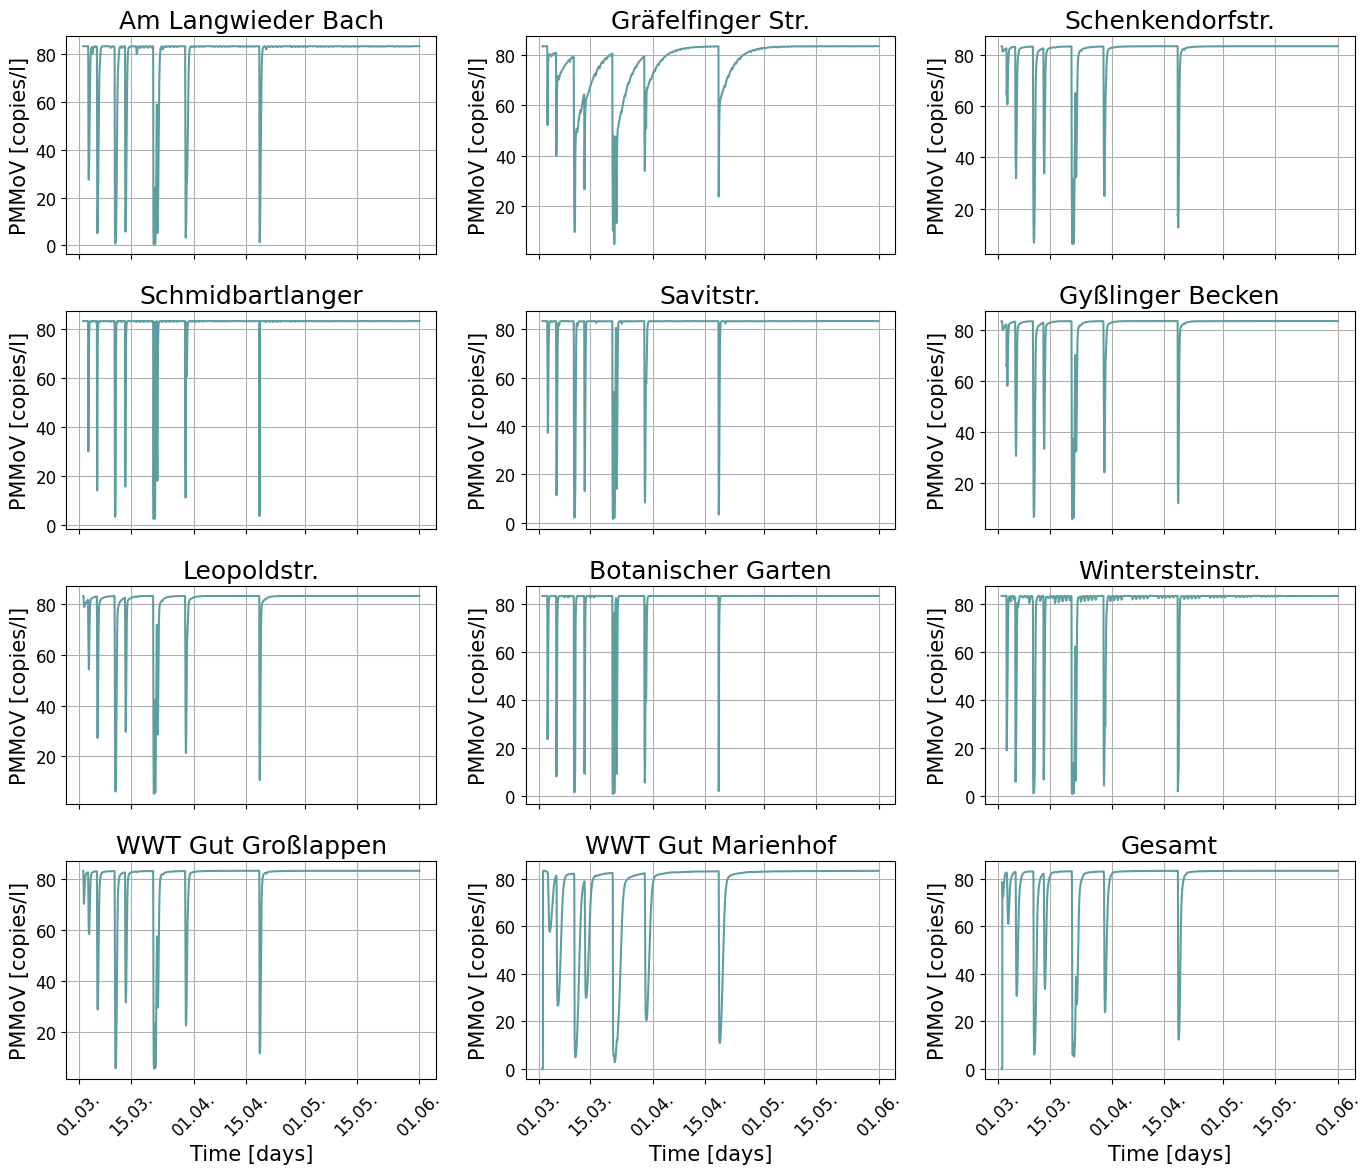

In [11]:
# Filter data
covid_df = df[(df["variable"] == "PMMoV") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, location in enumerate(locations_sorted, start=0):
    ax = axes[i]
    group = covid_df[covid_df["location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")
    ax.set_title(location)
    ax.set_ylabel("PMMoV [copies/l]")
    ax.grid(True)

# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()